## Support Vector Machine - Face Recognition

In this recitation you will use Support Vector Machine (SVM) to solve a face recognition problem: given the picture of the face of an unknown person, identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

### Dataset

You will use the Labeled Faces in the Wild (LFW) people dataset:
http://vis-www.cs.umass.edu/lfw/

Labeled Faces in the Wild (LFW) is a database of face photographs designed for studying the problem of unconstrained face recognition. This database was created and maintained by researchers at the University of Massachusetts, Amherst. 13,233 images of 5,749 people were detected and centered by the Viola Jones face detector and collected from the web. 1,680 of the people pictured have two or more distinct photos in the dataset. The original database contains four different sets of LFW images and also three different types of "aligned" images. According to the researchers, deep-funneled images produced superior results for most face verification algorithms compared to the other image types. Hence, the dataset is the deep-funneled version.

Each image is a 250 x 250 jpg, detected and centered using the openCV implementation of Viola-Jones face detector. 


### Load Dataset using Scikit-Learn

This dataset can be obtained by using the Scikit-Learn function: sklearn.datasets.fetch_lfw_people

Following are the relevant return attributes:

- data: numpy array of shape (13233, 2914)
        -- Each row corresponds to a ravelled face image of original size 62 x 47 pixels. Changing the slice_ or resize parameters will change the shape of the output.

- images : numpy array of shape (13233, 62, 47)
         -- Each row is a face image corresponding to one of the 5749 people in the dataset. Changing the slice_ or resize parameters will change the shape of the output.

- target : numpy array of shape (13233,)
        -- Labels associated to each face image. Those labels range from 0-5748 and correspond to the person IDs.
        
        
For this recitation you will use a **subset of this database**. Your subset will only retain pictures of people that have **at least 50 different pictures**. The subset will define a 12 class classification problem.

To ensure this, you will set the value of the "min_faces_per_person" attribute to 50. 

### Tasks:
1. Based on your reading of the notebook series on SVM (https://github.com/rhasanbd/Support-Vector-Machine-Classifier-Beginners-Survival-Kit), choose the best SVM model for this problem (choose from LinearSVC and Kernelized SVM).
2. [20 points] You will have to decide whether to do the following: scaling, dimensionality reduction by Principle Component Analysis (PCA)
        -- If you decide to use PCA, then you will have to find the optimal number of principle compoments. 
3. [50 points] Choose the optimal model hyperparameters via grid search. You will have to carefully set the range of values for the grid parameters. The SVM notebook series provide an extensive discussion on choosing the range of values for grid search. 
        -- You will loose points for using a too large range that lacks justification. Note that brute-force search defeats the whole purpose of intelligent learning.
4. [20 points] Display the model performance by confusion matrix and classification report. Additinally, you can generate heatmap plot of the confusion matrix using the seaborn library.
5. [10 points] Finally, answer the analytical questions.

Please note that your goal is to optimize the performance of your model. Thus, you will need to do careful planning and experimentation. 

The minumum "micro average" score for precision, recall, and f1 score (from classfication report) is 0.85.

If your "micro average" score is below 0.85, then irrespective of your work you will **loose maximum 50% of the points**.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# You may load additional libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

## Load Data

We will set the values of the "min_faces_per_person" attribute to 50. This will ensure that the extracted dataset will only retain pictures of people that have at least min_faces_per_person different pictures.

This subset will define a 12 class classification problem.

In [2]:
faces = fetch_lfw_people(min_faces_per_person=50)

X = faces.data
y = faces.target

print("\nLabel of the 12 Classes:\n", faces.target_names)
print("\nData Matrix Dimension: ", X.shape)
print("\nLength of the Class Label Array:", y.shape)


Label of the 12 Classes:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']

Data Matrix Dimension:  (1560, 2914)

Length of the Class Label Array: (1560,)


## Visualize the Images

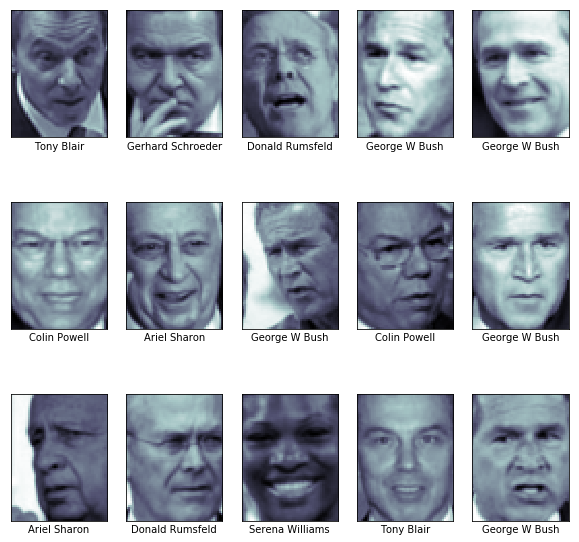

In [3]:
fig, ax = plt.subplots(3, 5)

fig.set_figheight(10)
fig.set_figwidth(10)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Split Training and Test Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [5]:
## TODO

## You may add seperate coding blocks as necessary.
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Applying PCA
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
print("Number of Principle Components: ", pca.n_components_)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# svm_clf = SVC(gamma=0.005, C=100)
# svm_clf.fit(X_train_pca, y_train)

# y_test_predicted = svm_clf.predict(X_test_pca)

# accuracy_score_test = np.mean(y_test_predicted == y_test)
# print("\nAccuracy: ", accuracy_score_test)


# print("\nTest Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_predicted))


# print("\nClassification Report:")
# print(classification_report(y_test, y_test_predicted))



param_grid = {'gamma': [0.0001, 0.001, 0.005,0.0005], 
              'C': [10, 100, 1000]}
clf = SVC()

clf_cv = GridSearchCV(clf, param_grid, scoring='f1_micro', cv=50)
clf_cv.fit(X_train_pca, y_train)

params_optimal = clf_cv.best_params_

print("Best Score (f1_micro): %f" % clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

svm_rbf_clf = SVC(kernel="rbf", **params_optimal)
svm_rbf_clf.fit(X_train_pca, y_train)







Number of Principle Components:  100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 37 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score (f1_micro): 0.817094
Optimal Hyperparameter Values:  {'C': 10, 'gamma': 0.005}




SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Evaluate Model Performance on Test Data

- Generate confusion matrix
- Generate classification report
- You can do addtional things if you want (e.g., heatmap representation of the confusion matrix)

In [7]:
## TODO


y_test_predicted = svm_rbf_clf.predict(X_test_pca)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))





Accuracy:  0.8564102564102564

Test Confusion Matrix:
[[ 14   1   0   0   0   0   0   0   0   0   0   1]
 [  2  61   0   1   1   0   0   0   0   0   1   0]
 [  0   1  21   2   1   0   1   0   1   0   0   0]
 [  2   4   7 124   0   2   1   0   0   0   0   0]
 [  0   0   1   1  20   0   0   1   0   0   0   1]
 [  0   4   0   1   0  12   0   0   0   0   0   0]
 [  0   1   0   4   0   0   4   0   0   0   0   1]
 [  0   0   1   0   0   0   0  13   0   0   0   0]
 [  0   1   0   1   0   0   0   0  14   0   0   0]
 [  0   1   0   1   0   0   0   0   0   9   0   0]
 [  0   2   0   1   0   0   0   0   0   0   6   0]
 [  0   0   0   2   1   0   0   0   1   0   0  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.80      0.92      0.86        66
           2       0.70      0.78      0.74        27
           3       0.90      0.89      0.89       140
           4       0.87      0.83    

## Summary of the Techniques & Model Parameters

Below provide a summary of the techniques and the model paramerters. For example:

- Scaling: yes or no
- PCA: yes or no
- PCA: number of optimal components = ?
- SVM model name = ? 
- SVM model optimal hyperparameters = ?
- etc.

Scaling: yes

PCA: yes

PCA: number of optimal components = 100

SVM model name = RBF

SVM model optimal hyperparameters = C = 10, gamma = 0.005


Since, PCA makes the performance better, I chose to use that. Also, we need to scale data if we want to use PCA, hence, I did scaling. According to the "RULE OF THUMB: I chose Smaller gamma and Larger C".

## Analytical Questions

### Question 1: Which SVM model did you use? Why did you choose it? Justify. [5 points]

#### Answer:
I chose larger RBF SVM model as per notebook 4(Support Vector Machine-Application 1-Image Classification.ipynb) since this was an image classification problem.

### Question 2: How did you set the range of the model hyperparameters (lower range and upper range)? Justify. [5 points]

#### Answer:
'gamma': [0.0001, 0.001, 0.005,0.0005], 
              'C': [10, 100, 1000]
              
According to the rule of thumb, we had to select Smaller gamma and Larger C.